# Data augmentation
A common problem is the amount of data available to enter the models, for these to present the expected results it is necessary that the training occurs with a large amount of data (dataset), but in many cases there is no the data needed to perform these tasks.
Is here where the **Data Augmentation** techniq begins, as its name indicates, it allows us to increase our dataset in two ways:




*   Introducing perturbations in the original data. For example: taking an original image centered, we replicate it off-center, inverting axes, etc.
*   Using different distributions. Example: if we want to train a model to classify high resolution images, we add low resolution images, with noise… always maintaining the highest proportion of high resolution.



At first, neural networks are not intelligent. For example, a poorly trained neural network would think that these three tennis balls shown below are distinct and unique images.

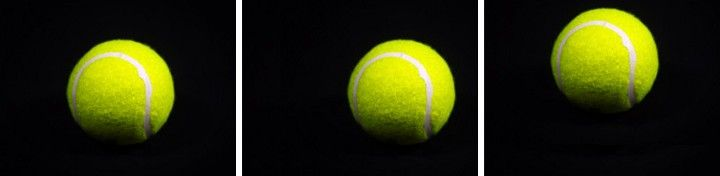



The same tenis ball, with some translations.



So if we work with images, it is only necessary to make some small alterations to our dataset and we can achieve our goal.
There are many ways to augment data with images, such as:


1.   Flip the image
2.   Rotation

1.   Scale
2.   Cuts

1.   Translations
2.   Gaussian noise









The Keras library provides the ability to use data augmentation automatically when training a model. This is accomplished by using the ImageDataGenerator class. A variety of techniques are supported as well as pixel scaling methods, such as:



*   The changes in the images (translations) through the arguments  **width_shift_range** and **height_shift_range**.
*  Flip the image through the arguments **horizontal_flip** and **vertical_flip**.
*   Image rotations, through the arguments **rotation_range**
*   Image brightness by the argument **brightness_range**.
*   Zoom to the image through by the argument **zoom_range**.

Let's independently look at examples of images after they have been magnified. It is common to use a variety of augmentation techniques at the same time during training.


In [ ]:
import matplotlib.pyplot as plt    #Libreria que permite graficar, muy al estilo de MATLAB
import numpy as np                  #Libreria que permite trabajar con arreglo  
from numpy import expand_dims       #Expande la forma del arreglo 
from keras.preprocessing.image import load_img    #De la libreria de Keras para aumentacion de datos, cargamos la imagen en el formato de la libreria de imagenes de python (PIL)
from keras.preprocessing.image import img_to_array #tomará una  imagen (PIL) y la convierte en una matriz. Si parte de una imagen PNG, los valores dentro de la imagen estarán entre 0 y 255.
from keras.preprocessing.image import ImageDataGenerator #clase que toma datos originales, los transforma de forma aleatoria y devuelve solo los datos nuevos transformados
from PIL import Image #libreria de imagenes de python
from urllib.request import urlopen #Permite leer una direccion electronica


Firts, we upload an internet image


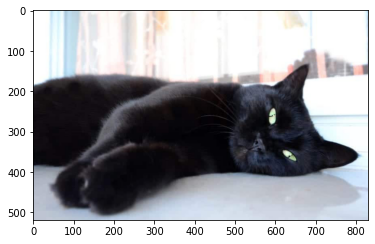

In [ ]:
url = 'https://www.notigatos.es/wp-content/uploads/2018/02/gato-negro-tumbado-830x519.jpg'
filename = urlopen(url)
img = Image.open(filename)
plt.imshow(img)

Let's start with a change in the image which means moving all the pixels of the image in one direction, horizontally or vertically, while maintaining the same image dimensions.

The arguments width_shift_range and height_shift_range of the ImageDataGenerator constructor, control the amount of horizontal and vertical scrolling respectively.


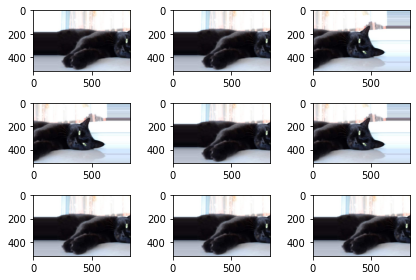

In [ ]:
# Convertimos la imagen a un arreglo
data = img_to_array(img)
# realizamos una expansion a una muestra 
samples = expand_dims(data, 0)
# Creamos el aumentador de datos utilizando solo cambio de imgen 
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# preparamos el iterator
it = datagen.flow(samples, batch_size=1)
# generamos muestras y mostramos los resultados
for i in range(9):
	plt.subplot(330 + 1 + i)
	# se generan lotes de imagenes
	batch = it.next()
	image = batch[0].astype('uint8') #se convierte a un valor valido para poder mostrarlo como imagen 
	plt.imshow(image)
	plt.tight_layout()
plt.show()

An image flip means to reverse the rows or columns of pixels in the case of a vertical or horizontal flip, respectively.
The increase is specified by a Boolean argument **horizontal_flip** or **vertical_flip** for the case of **ImageDataGenerator**.

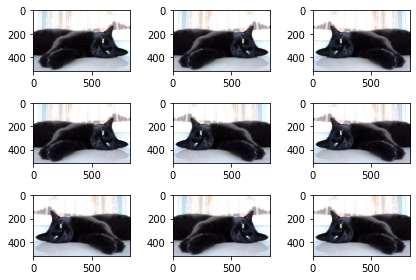

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
plt.show()

The amount of zoom is sampled uniformly at random from the zoom region for each dimension (width, height) separately.

Floating or [limite inferior, limite superior]. Range for random zoom. If is a floating, [limite inferior, limite superior] = [1-zoom_range, 1 + zoom_range]

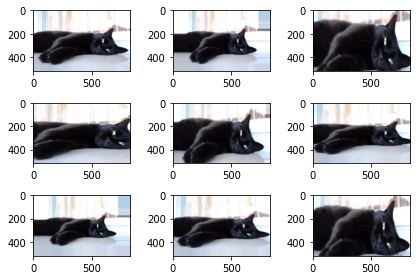

In [ ]:
datagen = ImageDataGenerator(zoom_range=.5) #float o Rango [lower,upper]
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

The image is randomly rotated clockwise a specified number of degrees from 0 to 360. It is likely to rotate pixels outside of the image frame, leaving areas of the frame with no pixel data, which need to be filled.

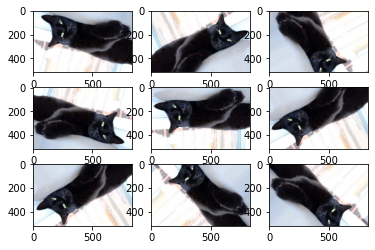

In [ ]:
datagen = ImageDataGenerator(rotation_range=220)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

The combination of these techniques allows us to increase the amount of data in the dataset to be used, in many times a data augmentation is used to increase the amount of training images and improve the precision of the bot.


              featurewise_center: Boleano, poner la media de cada elemento en cero de todos los datos.
              samplewise_center**: Boleano, poener la media del cada muestra a cero
              featurewise_std_normalization: Boleano, Divida las entradas por la desviación estándar (std.) del conjunto de datos, según las características.
              samplewise_std_normalization: Boleano, divide cada dato por su std.
              zca_epsilon: El valor predeterminado es 1e-6.
              zca_whitening: Boleano, indica si se aplica el blanqueo ZCA.      

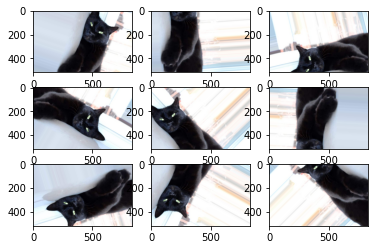

In [ ]:
datagen = ImageDataGenerator(
            rotation_range               = 90,      
            width_shift_range            = [100,100],   
            height_shift_range           = [100,100],   
            horizontal_flip              = True,   
            vertical_flip                = True)  
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
plt.show()

## Shear
Shear angle in counter-clockwise direction in degrees

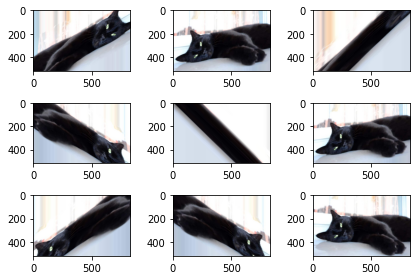

In [ ]:
datagen = ImageDataGenerator(shear_range=200) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

##Scroll the height
The argument height_shift_range of the ImageDataGenerator constructor, control the amount of horizontal and vertical scrolling respectively.

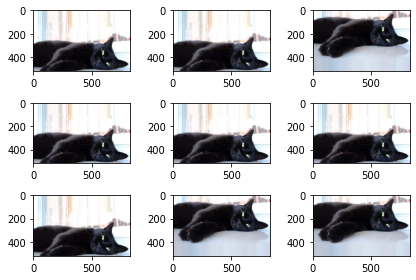

In [ ]:
datagen = ImageDataGenerator(height_shift_range=[-100,100]) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

##Brightness
change image brightness randomly between 2 ranges

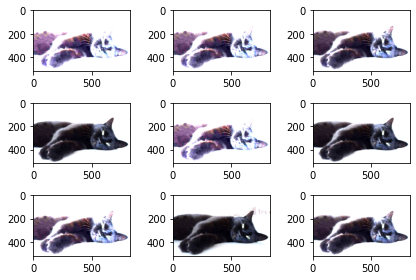

In [ ]:
datagen = ImageDataGenerator(brightness_range=[0,10]) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

## Channel Shift
Random chanel shifts

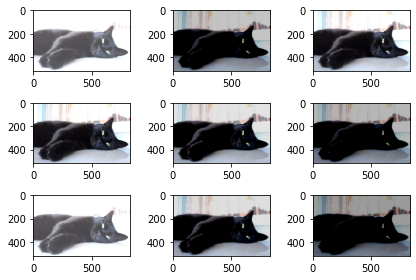

In [ ]:
datagen = ImageDataGenerator(channel_shift_range=100) 
it = datagen.flow(samples, batch_size=1)
for i in range(9):
	plt.subplot(330 + 1 + i)
	batch = it.next()
	image = batch[0].astype('uint8')
	plt.imshow(image)
	plt.tight_layout()
 
plt.show()

Now we consider words, the necessary work is not so simple given the inherent complexity of the language (we cannot replace each word by its synonym and even if we do, we run the risk that the meaning of the sentence changes completely.
There are some libraries that can help us to carry out this task, we will start by analyzing the following libraries:


1.   Text Attack
2.   Google Trans

# TextAttack
It is a Python framework for adversary attacks, adversary training, and data augmentation in NLP. We will focus only on data augmentation.

In [ ]:
!pip install textattack

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

wandb: WARNING W&B installed but not logged in.  Run `wandb login` or set the WANDB_API_KEY env variable.


In [ ]:
text = "Good thing they changed the design of sonic in the movie"

TextAttack give us 4 methods for the increase of data.


## WordNetAugmenter
Augments the text by replacing it with synonyms from the WordNet thesaurus (Dictionary of synonyms).

WordNet is a lexical database for English. Nouns, verbs, adjectives, and adverbs are grouped into sets of cognitive synonyms (synsets), each of which expresses a different concept.
WordNet superficially resembles a thesaurus in that it groups words based on their meaning.



In [ ]:
aug = WordNetAugmenter();
aug.augment(text)

['Good thing they changed the design of transonic in the movie']


## EmbeddingAugmenter
 Augment text by transforming words with their inlays, with a constraint to ensure that their cosine similarity is at least 0.8.


In [ ]:
aug = EmbeddingAugmenter();
aug.augment(text)

textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:38<00:00, 12.7MB/s]
textattack: Unzipping file /root/.cache/textattack/tmp_k6km_nv.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


['Well thing they changed the design of sonic in the movie']

## CharSwapAugmenter
Augment text by substituting, deleting, inserting, and swapping adjacent characters.

In [ ]:
aug = CharSwapAugmenter()
aug.augment(text)

['Good thing they changed the design of sonic in the mAvie']


## EasyDataAugmenter
This augments the text with a combination of Wordnet synonym replacement, word deletion, word order changes, and synonym insertions. All these 4 functionalities occur randomly. So we will get different results every time we run the code. This returns 4 augmented results, unlike the other methods.


In [ ]:
aug = EasyDataAugmenter()
aug.augment(text)

['Good thing they changed the design of in the movie',
 'Good thing sonic changed the design of they in the movie',
 'effective thing they changed the design of sonic in the movie',
 'Good thing they transonic changed the design of sonic in the movie']

Googletrans uses the Google Translate Ajax API for language detection and translation.

The key parameters for the method **translate ()** are:



1.   **src**: Source language. this parameter is optional since **googletrans** will detect it.
2.   **dest**: Destination language. Mandatory parameter.

1.   **text**: the text to be translated from the source language to the destination language. Mandatory parameter.





 



When using this method what happens is a retranslation, we go from the original language to a target language and then we return to the original, during this backtranslation, there is a slight change in the sentence between the original text and the backtranslated text, but the general meaning of the sentence is still there.

The supported languages, can be found at https://cloud.google.com/translate/docs/languages?hl=es

To obtain the best results it is recommended to do some tests with the languages, if the target language is very similar, the translation does not lose information, however there may be the problem that the translation is too literal, this becomes a bit of a problem. try and failure.


Some examples of languages:


*   African	'af'

*   Chinese (simplified) 	'zh-CN o zh'

*   Esperanto	'eo'

*   Japonese	'ja'
*   Latin	'la'


*   Spanish	'es'


*   Turkmen	'tk'


*   Yiddish	'yi'

*   Zulú	'zu'



In [ ]:
!pip install googletrans

     |████████████████████████████████| 61kB 2.8MB/s 
     |████████████████████████████████| 51kB 3.1MB/s 
     |████████████████████████████████| 972kB 4.7MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 71kB 6.5MB/s 
     |████████████████████████████████| 102kB 7.1MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-cp36-none-any.whl size=15736 sha256=d0320484a376376abf7a3cf6c0ed4a03e61c0acb60be72a1b90db8da22ae1f95
  Stored in directory: /root/.cache/pip/wheels/28/1a/a7/eaf4d7a3417a0c65796c547cff4deb6d79c7d14c2abd29273e
  Created wheel for contextvars: filename=contextvars-2.4-cp36-none-any.whl size=7666 sha256=0067226001c351c6dacb0afb9ccdee64a1af95262016f66b457b3022c2eea4d5
  Stored in directory: /root/.cache/pip/wheels/a5/7d/68/1ebae2668bda2228686e3c1cf16f2c2384cea6e9334ad5f6de
Successfully built googletrans contextvars


In [ ]:
from googletrans import Translator
translator = Translator()

In [14]:
origin_text = "Good thing they changed the design of sonic in the movie"
text_trans = translator.translate(text=origin_text, dest='ja').text
final=translator.translate(text=text_trans, dest='es').text
print(origin_text)
print(text_trans)
print(final)

Good thing they changed the design of sonic in the movie
彼らが映画の中でソニックのデザインを変えたのは良いことです
Es bueno que hayan cambiado el diseño de Sonic en la película.
